# Estymatory największej wiarygodności

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [3]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

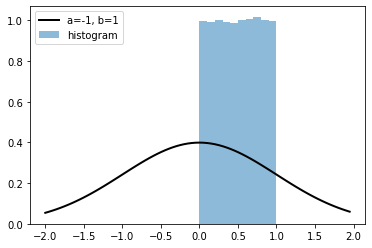

In [4]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

$$
\mu=\frac{1}{n}\sum_{i=1}^n x_i
$$
$$
\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2
$$
</ul>

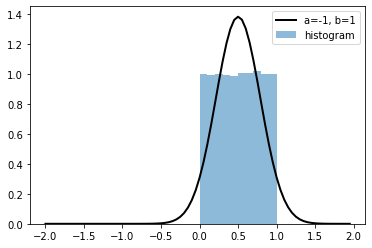

In [5]:
mu = np.mean(data)
sigma = np.std(data)
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

0.5005395549522791
0.28841250271294855


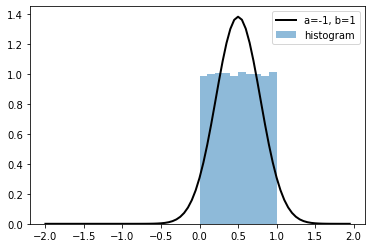

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N = 100000
u=stats.uniform()
data = u.rvs(size=N)
#mu= 0
mu = sum(data)/N
#sigma = 1
sigma = np.sqrt(sum((x-mu)**2 for x in data)/N)
#mu, sigma = stats.norm.fit(data)
print(mu)
print(sigma)
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, stacked=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

0.49836933949861983
0.28897592019918344


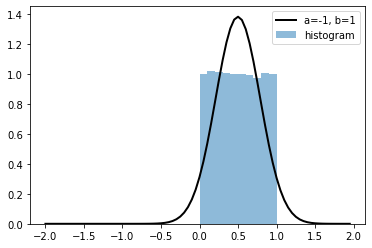

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N = 100000
u=stats.uniform()
data = u.rvs(size=N)
#mu= 0
# mu = sum(data)/N
#sigma = 1
# sigma = np.sqrt(sum((x-mu)**2 for x in data)/N)
mu, sigma = stats.norm.fit(data)
print(mu)
print(sigma)
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, stacked=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [8]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [9]:
def l(x):
    mu, sigma = x
    return -np.sum(np.log(Gpdf(data, mu, np.abs(sigma))))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [10]:
print(l((0,1)))
print(l((0,2)))
print(l((1,1)))
print(l((0.5,0.2)))

108487.80737083002
165357.0598890525
108650.87342096806
35337.23896285174


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [11]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [19]:
x0 = np.asarray((1, 1))  # Initial guess.
res1 = optimize.fmin_cg(l, x0)
print(res1)

         Current function value: 17752.661775
         Iterations: 10
         Function evaluations: 170
         Gradient evaluations: 53
[0.49836933 0.28897591]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [13]:
def c(x,m,s2,t2):
    return (np.sqrt(2/np.pi))*(1/np.sqrt(s2))*1/(1+np.sqrt(t2))
def SN(x):
    x,m,s2,t2 = x
    if x<=m:
        return c(x,m,s2,t2)*np.exp(-(x-m)**2/(2*s2))
    else:
        return c(x,m,s2,t2)*np.exp(-(x-m)**2/(2*t2*s2))

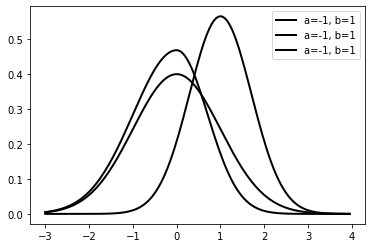

In [14]:
t = np.arange(-3, 4, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, [SN((x,0,1,1)) for x in t], 'k-', lw=2, label='a=-1, b=1')
ax.plot(t, [SN((x,0,1,0.5)) for x in t], 'k-', lw=2, label='a=-1, b=1')
ax.plot(t, [SN((x,1,0.5,1)) for x in t], 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [36]:
def l2(x):
    m, s, t = x
    s2=s**2
    t2=t**2
    return -np.sum(np.log(np.abs([SN((x, m, s2, t2)) for x in data])))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [40]:
x0 = np.asarray((0.2, 0.28, 2))  # Initial guess.
res2 = optimize.fmin_cg(l2, x0)
print(res2)

         Current function value: 984.728630
         Iterations: 147
         Function evaluations: 1404
         Gradient evaluations: 348
[ 1.44343976  0.15732495 20.53661461]


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [24]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

C:\Users\zwato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

In [26]:
m0, s0 = stats.norm.fit(data)
m0, s0

(3.795042687747036, 2.1036283563444593)

In [29]:
m1, s1 = optimize.fmin_cg(l, (2, 1))
m1, s1

         Current function value: 1094.276701
         Iterations: 14
         Function evaluations: 102
         Gradient evaluations: 32


(3.7950427526259642, 2.1036282912356596)

In [41]:
m2, s2, t2 = optimize.fmin_cg(l2, (0.5, 0.28, 2))
m2, s2, t2 

         Current function value: 984.728630
         Iterations: 124
         Function evaluations: 1228
         Gradient evaluations: 304


(1.4434326369729393, 0.1573201942070448, 20.537266737502836)

In [ ]:
t = np.arange(0, 10, 0.05)
tl=(0,m2,0.05)
tr=(m2,10,0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.hist(data, density=True, stacked=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)

ax.plot(t, stats.norm.pdf(t,m0, s0), lw=2, color='r')
ax.plot(t, stats.norm.pdf(t,m1, s1), lw=2, color='g')
ax.plot(tl, stats.norm.pdf(tl, m2, s2), lw=2, color='b')
ax.plot(tr, stats.norm.pdf(tr, m2, s2*t2), lw=2, color='b')

ax.legend()
plt.show()